In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load CSV file
file_path = "../data/sample_level_2_100k.csv"
data = pd.read_csv(file_path, delimiter=";")

In [3]:
data.head()

,gender,salary,rent,age,canton,lat,lon,height,weight,z1,z2
0,Gender.FEMALE,4193.645238,865.536752,44,JU,47.42253,7.20703,1.667893,71.707320,1.550118,7.741029
1,Gender.MALE,0.000000,0.000000,9,VS,46.20951,7.26012,1.921797,138.108271,1.059330,7.690756
2,Gender.FEMALE,0.000000,0.000000,4,AG,47.25954,7.94689,1.820761,45.683953,1.973104,7.739193
3,Gender.FEMALE,4290.459329,756.489648,16,LU,47.13469,8.13774,1.763355,83.012875,1.921503,7.735390
4,Gender.MALE,6903.188726,1843.434386,82,FR,46.88929,7.11057,1.809120,68.590481,1.487902,7.718315


/var/folders/q0/hy1vcj9j02qdx_zx_2mqwvhm0000gn/T/ipykernel_9839/2998931960.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/var/folders/q0/hy1vcj9j02qdx_zx_2mqwvhm0000gn/T/ipykernel_9839/2998931960.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


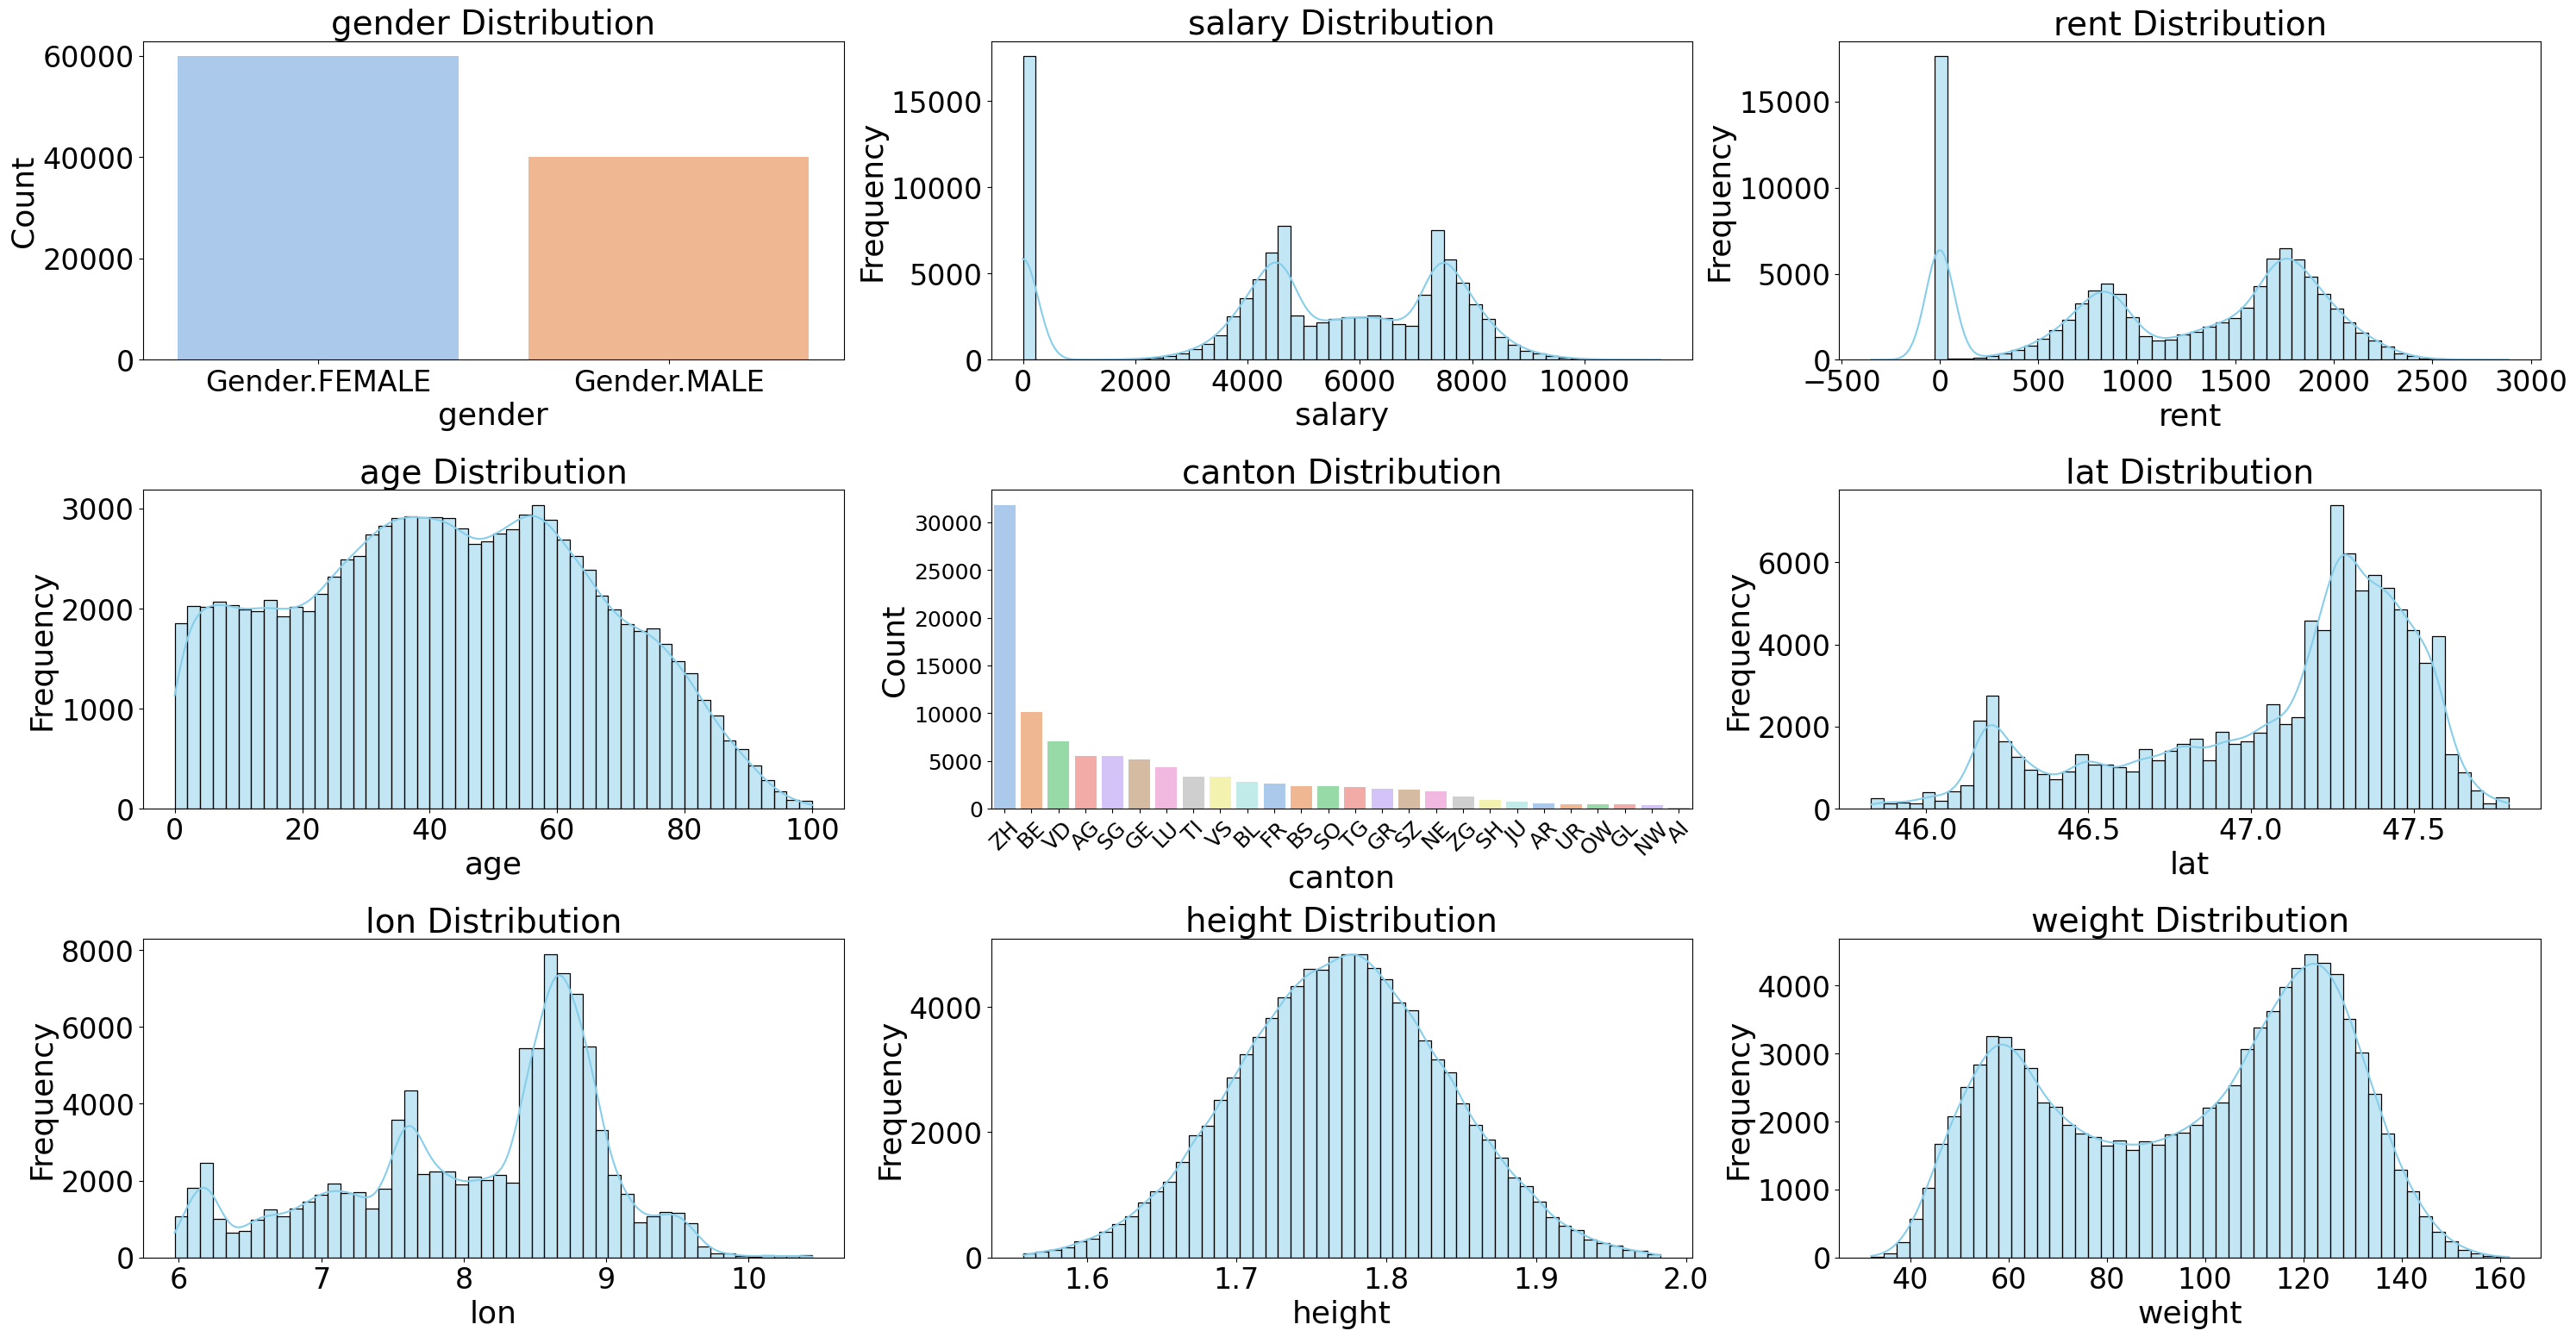

In [11]:
# Identify numeric columns and non-numeric columns separately for appropriate visualization
numeric_cols = data.iloc[:, :9].select_dtypes(include=["float64", "int64"]).columns
categorical_cols = data.iloc[:, :9].select_dtypes(include=["object"]).columns

# Set up a 3x4 plotting layout
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(30, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the distribution of each column
for i, column in enumerate(data.columns[:9]):
    if column in numeric_cols:
        # For numeric columns, use histograms
        sns.histplot(data[column], bins=50, ax=axes[i], color="skyblue", kde=True)
        axes[i].set_title(f"{column} Distribution", fontsize=28)
        axes[i].set_xlabel(column, fontsize=26)
        axes[i].set_ylabel("Frequency", fontsize=26)
        axes[i].tick_params(axis="both", which="major", labelsize=24)
    elif column == "canton":
        # For categorical columns, use count plots
        sns.countplot(
            x=column,
            data=data,
            ax=axes[i],
            palette="pastel",
            order=data[column].value_counts().index,
        )
        axes[i].set_title(f"{column} Distribution", fontsize=28)
        axes[i].set_xlabel(column, fontsize=26)
        axes[i].set_ylabel("Count", fontsize=26)
        axes[i].tick_params(axis="both", which="major", labelsize=18)
        # rotation 45
        axes[i].tick_params(axis="x", rotation=45)
    elif column in categorical_cols:
        # For categorical columns, use count plots
        sns.countplot(
            x=column,
            data=data,
            ax=axes[i],
            palette="pastel",
            order=data[column].value_counts().index,
        )
        axes[i].set_title(f"{column} Distribution", fontsize=28)
        axes[i].set_xlabel(column, fontsize=26)
        axes[i].set_ylabel("Count", fontsize=26)
        axes[i].tick_params(axis="both", which="major", labelsize=24)

# Remove any empty subplots
for j in range(len(data.columns[:9]), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

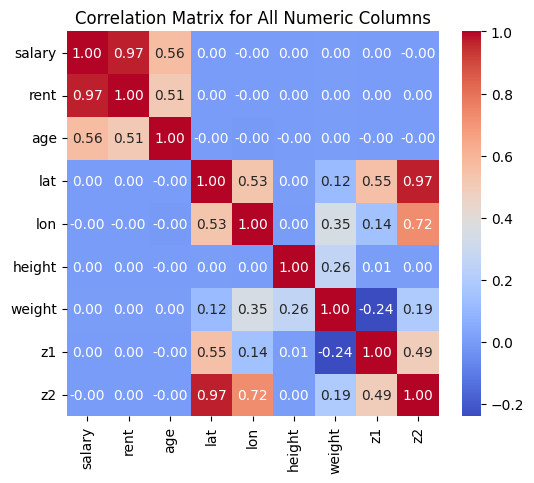

In [6]:
# Compute correlation matrix for numeric columns only
correlation_matrix_all = data[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix_all, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for All Numeric Columns")
plt.show()

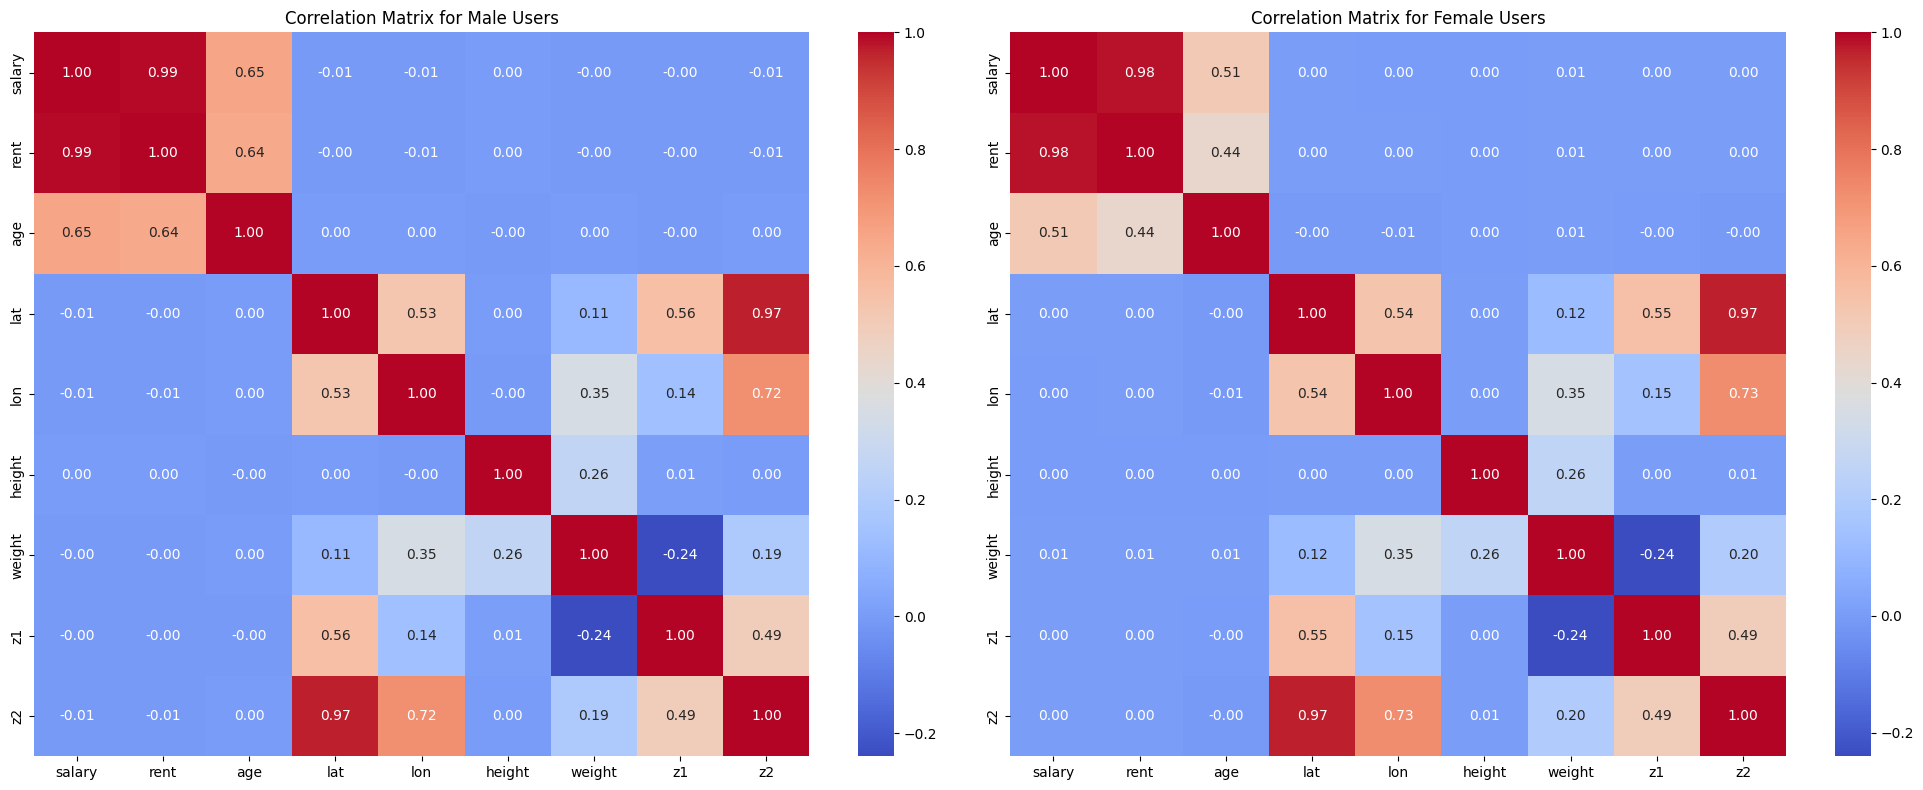

In [7]:
# Filter the dataset for male and female users separately
male_data = data[data["gender"] == "Gender.MALE"]
female_data = data[data["gender"] == "Gender.FEMALE"]

# Compute correlation matrices for numeric columns only for male and female data
male_correlation_matrix = male_data[numeric_cols].corr()
female_correlation_matrix = female_data[numeric_cols].corr()

# Create a side-by-side plot for correlation matrices of male and female users
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot correlation matrix for male users
sns.heatmap(male_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Matrix for Male Users")

# Plot correlation matrix for female users
sns.heatmap(
    female_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1]
)
axes[1].set_title("Correlation Matrix for Female Users")

plt.tight_layout()
plt.show()

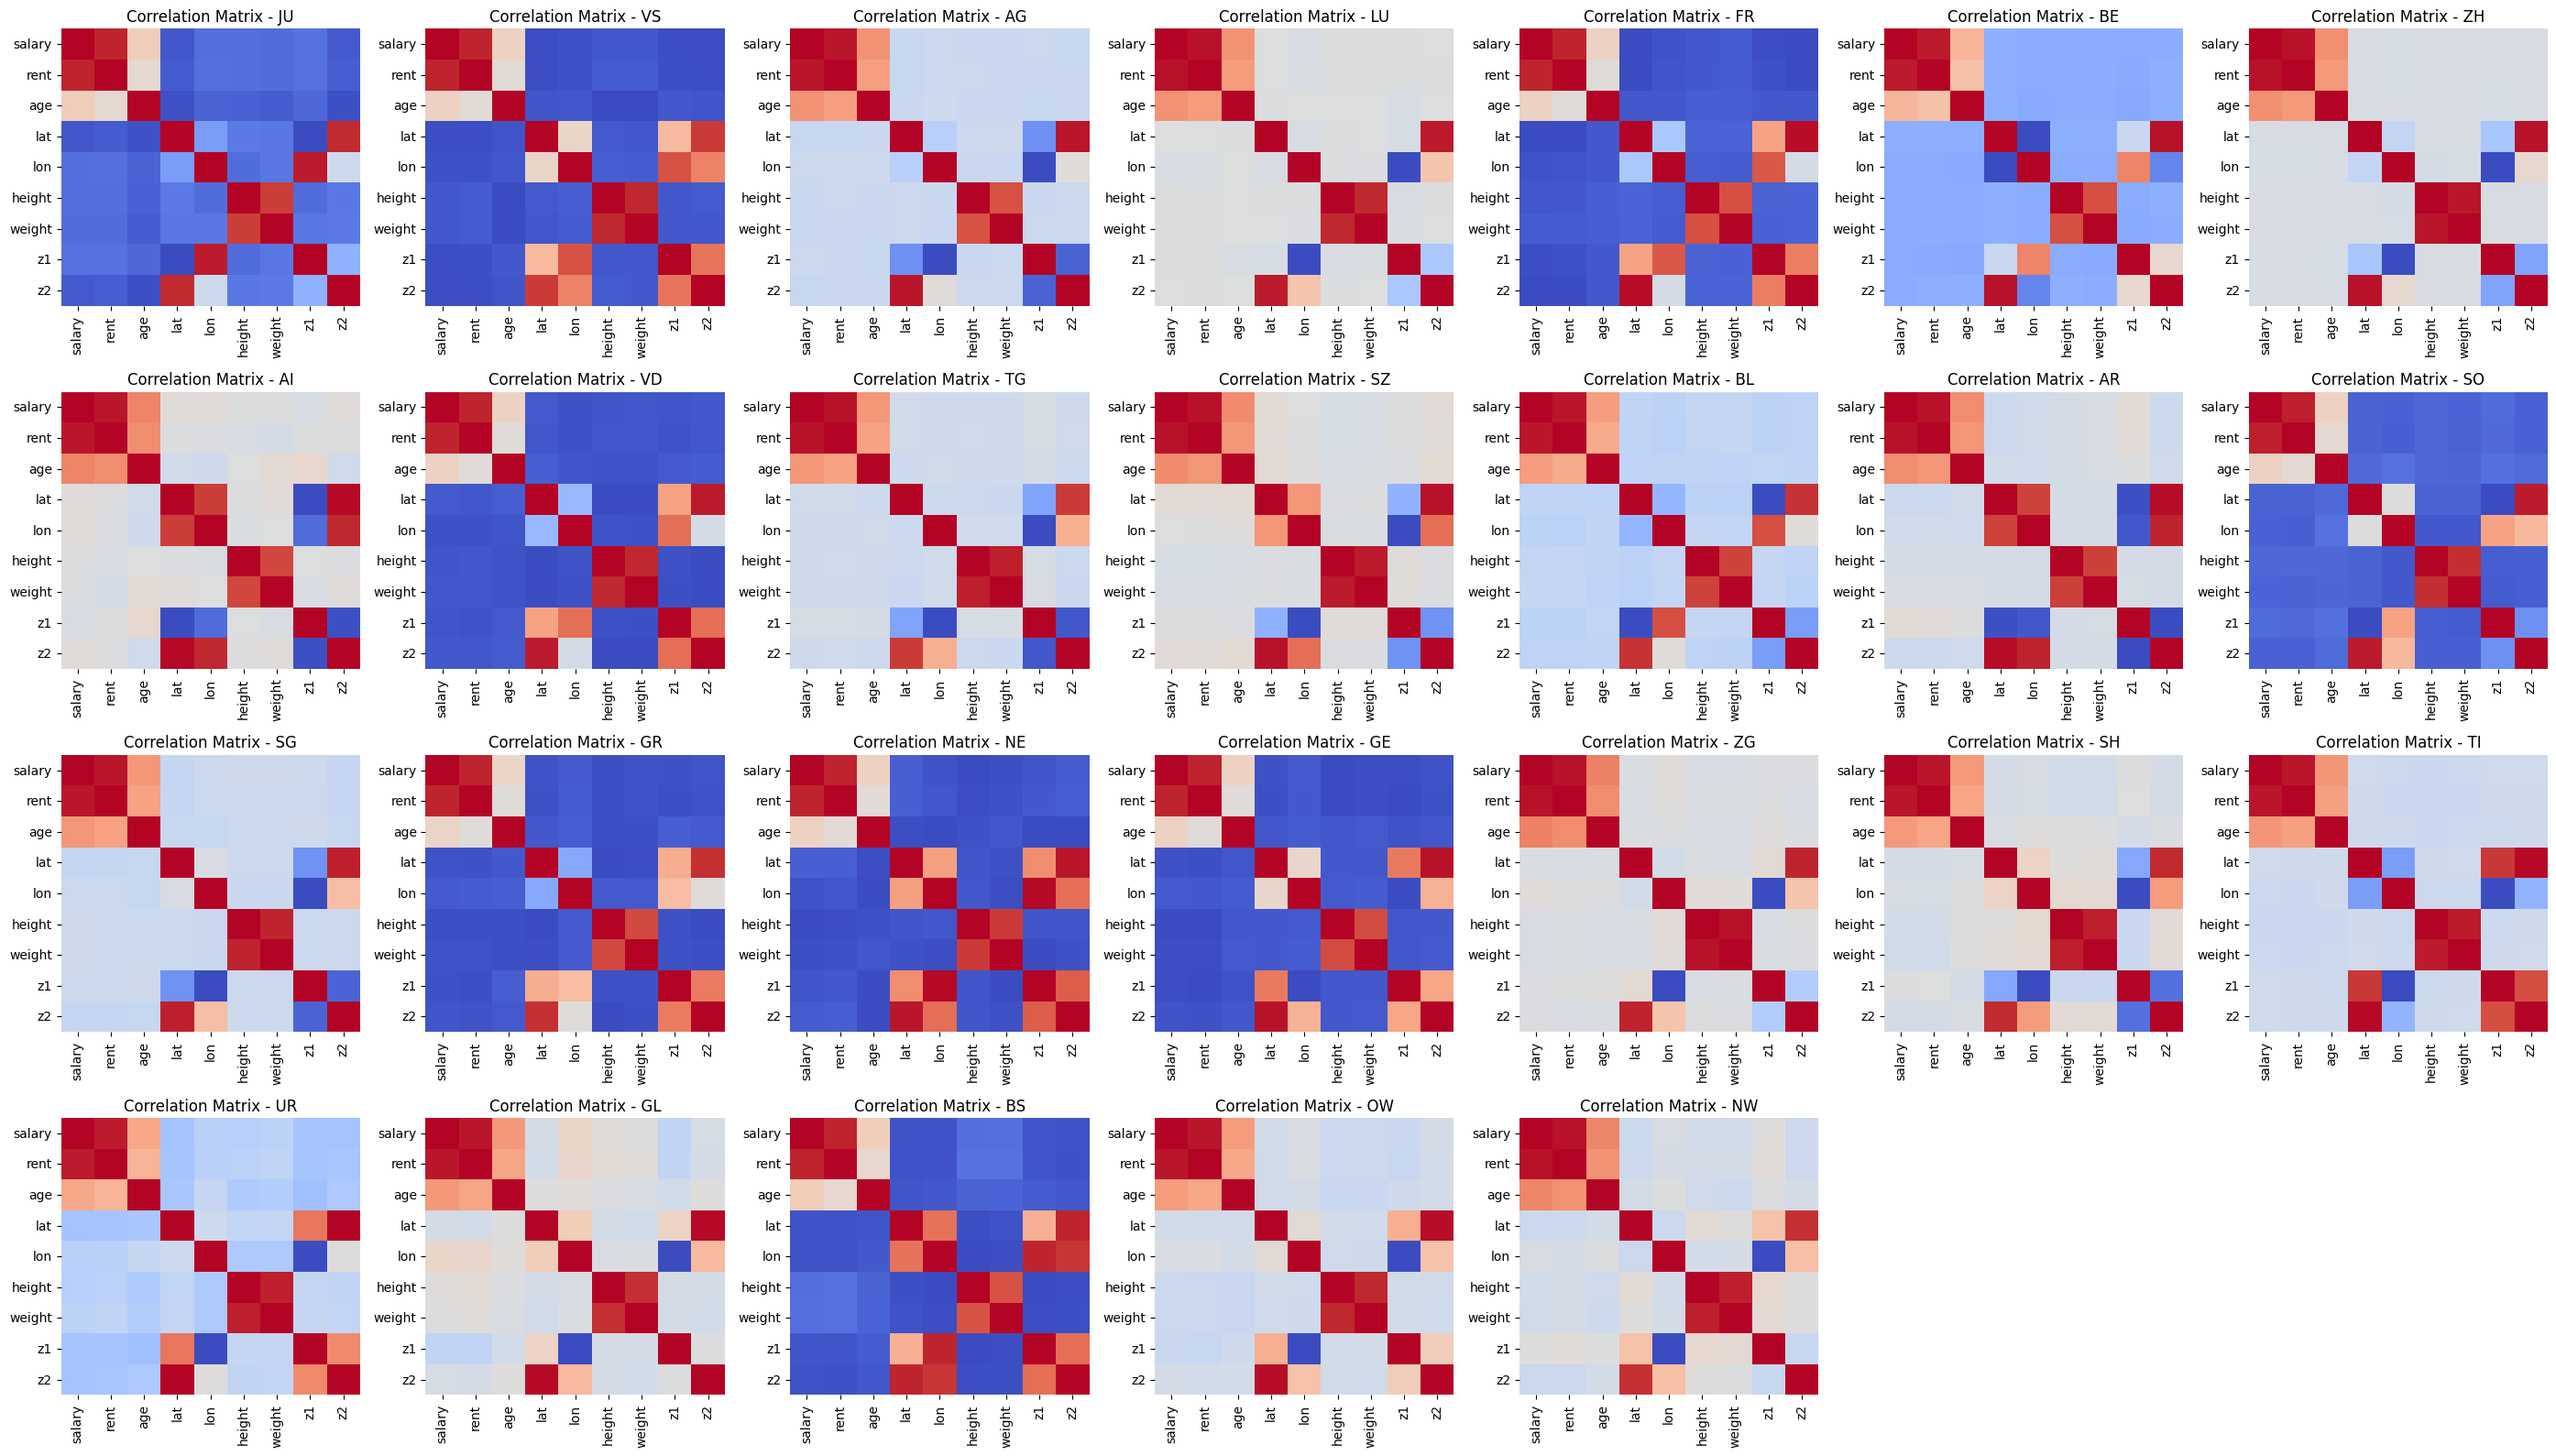

In [8]:
# Derive a list of unique cantons in the dataset
cantons = data["canton"].unique()

# Re-adjust the number of subplots based on the number of cantons
nrows = 4
fig, axes = plt.subplots(nrows=nrows, ncols=7, figsize=(28, nrows * 4))
axes = axes.flatten()

# Iterate through each canton and create correlation heatmaps
for i, canton in enumerate(cantons):
    # Filter data for the canton
    canton_data = data[data["canton"] == canton]
    # Compute the correlation matrix for the canton
    canton_corr = canton_data[numeric_cols].corr()
    # Plot the correlation matrix
    sns.heatmap(canton_corr, annot=False, cmap="coolwarm", ax=axes[i], cbar=False)
    axes[i].set_title(f"Correlation Matrix - {canton}")

# Remove any empty subplots
for j in range(len(cantons), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()